# Creditcard Fraud detection

In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd  # For data handling and processing
import numpy as np  # For numerical operations and working with arrays

# Visualization libraries for creating plots and graphs
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For general plotting

# Importing statsmodels for statistical modeling and analysis
import statsmodels.api as sm  # For advanced statistical models

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Setting pandas option to display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)

# Loading the credit card fraud dataset from the specified file path
card = pd.read_csv(r'/kaggle/input/creditcardfraud/creditcard.csv')

# Display the first few rows of the dataset to get an overview of the data
card.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Display a concise summary of the dataset
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Generate descriptive statistics of the dataset, transposed for easier reading
card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# Display the dimensions of the dataset (number of rows and columns)
card.shape


(284807, 31)

#### Observation: 
> The dataset contains 284,807 rows and 31 columns

# Performing data quality checks on the dataset

## Check for NULL/MISSING values

In [6]:
# Calculate the percentage of missing values in each column, sorted
round(100 * (card.isnull().sum()/len(card)), 2).sort_values(ascending=False)


Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [7]:
# Calculate the percentage of missing values in each row, sorted
round(100 * (card.isnull().sum(axis=1)/len(card)), 2).sort_values(ascending=False)


0         0.0
189869    0.0
189875    0.0
189874    0.0
189873    0.0
         ... 
94942     0.0
94943     0.0
94944     0.0
94945     0.0
284806    0.0
Length: 284807, dtype: float64

### Note:
- No `MISSING` or `NULL` values found in either columns or rows

## Check for duplicate

In [8]:
# Create a copy of the dataset and remove any duplicate rows
card_duplicate = card.copy()
card_duplicate.drop_duplicates(subset=None, inplace=True)


In [9]:
# Check the shape of the original dataset
card.shape

# Check the shape of the dataset after removing duplicates
card_duplicate.shape



# Compare the shape of the original dataset and the dataset after removing duplicates
print(f"Original dataset shape: {card.shape}")
print(f"Dataset shape after removing duplicates: {card_duplicate.shape}")

Original dataset shape: (284807, 31)
Dataset shape after removing duplicates: (283726, 31)


### Difference 

In [10]:
# Compare the shape of the original and cleaned datasets with the difference in a new column
comparison = pd.DataFrame({
    "Original Dataset": card.shape, 
    "After Removing Duplicates": card_duplicate.shape
}, index=["Rows", "Columns"])

# Add a column showing the difference between the original and cleaned datasets
comparison["Difference"] = comparison["Original Dataset"] - comparison["After Removing Duplicates"]
comparison



,Original Dataset,After Removing Duplicates,Difference
Rows,284807,283726,1081
Columns,31,31,0


### Note:
- 1081 Duplicate rows are found in the records

In [11]:
## Assign the cleaned dataset (with duplicates removed) back to the original variable
card = card_duplicate

# Verify the shape of the updated dataset
card.shape


(283726, 31)

In [12]:
del card_duplicate

# EDA - EXPLORATORY DATA ANALYSIS

In [13]:
# Get a summary of the dataset
card.info()


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

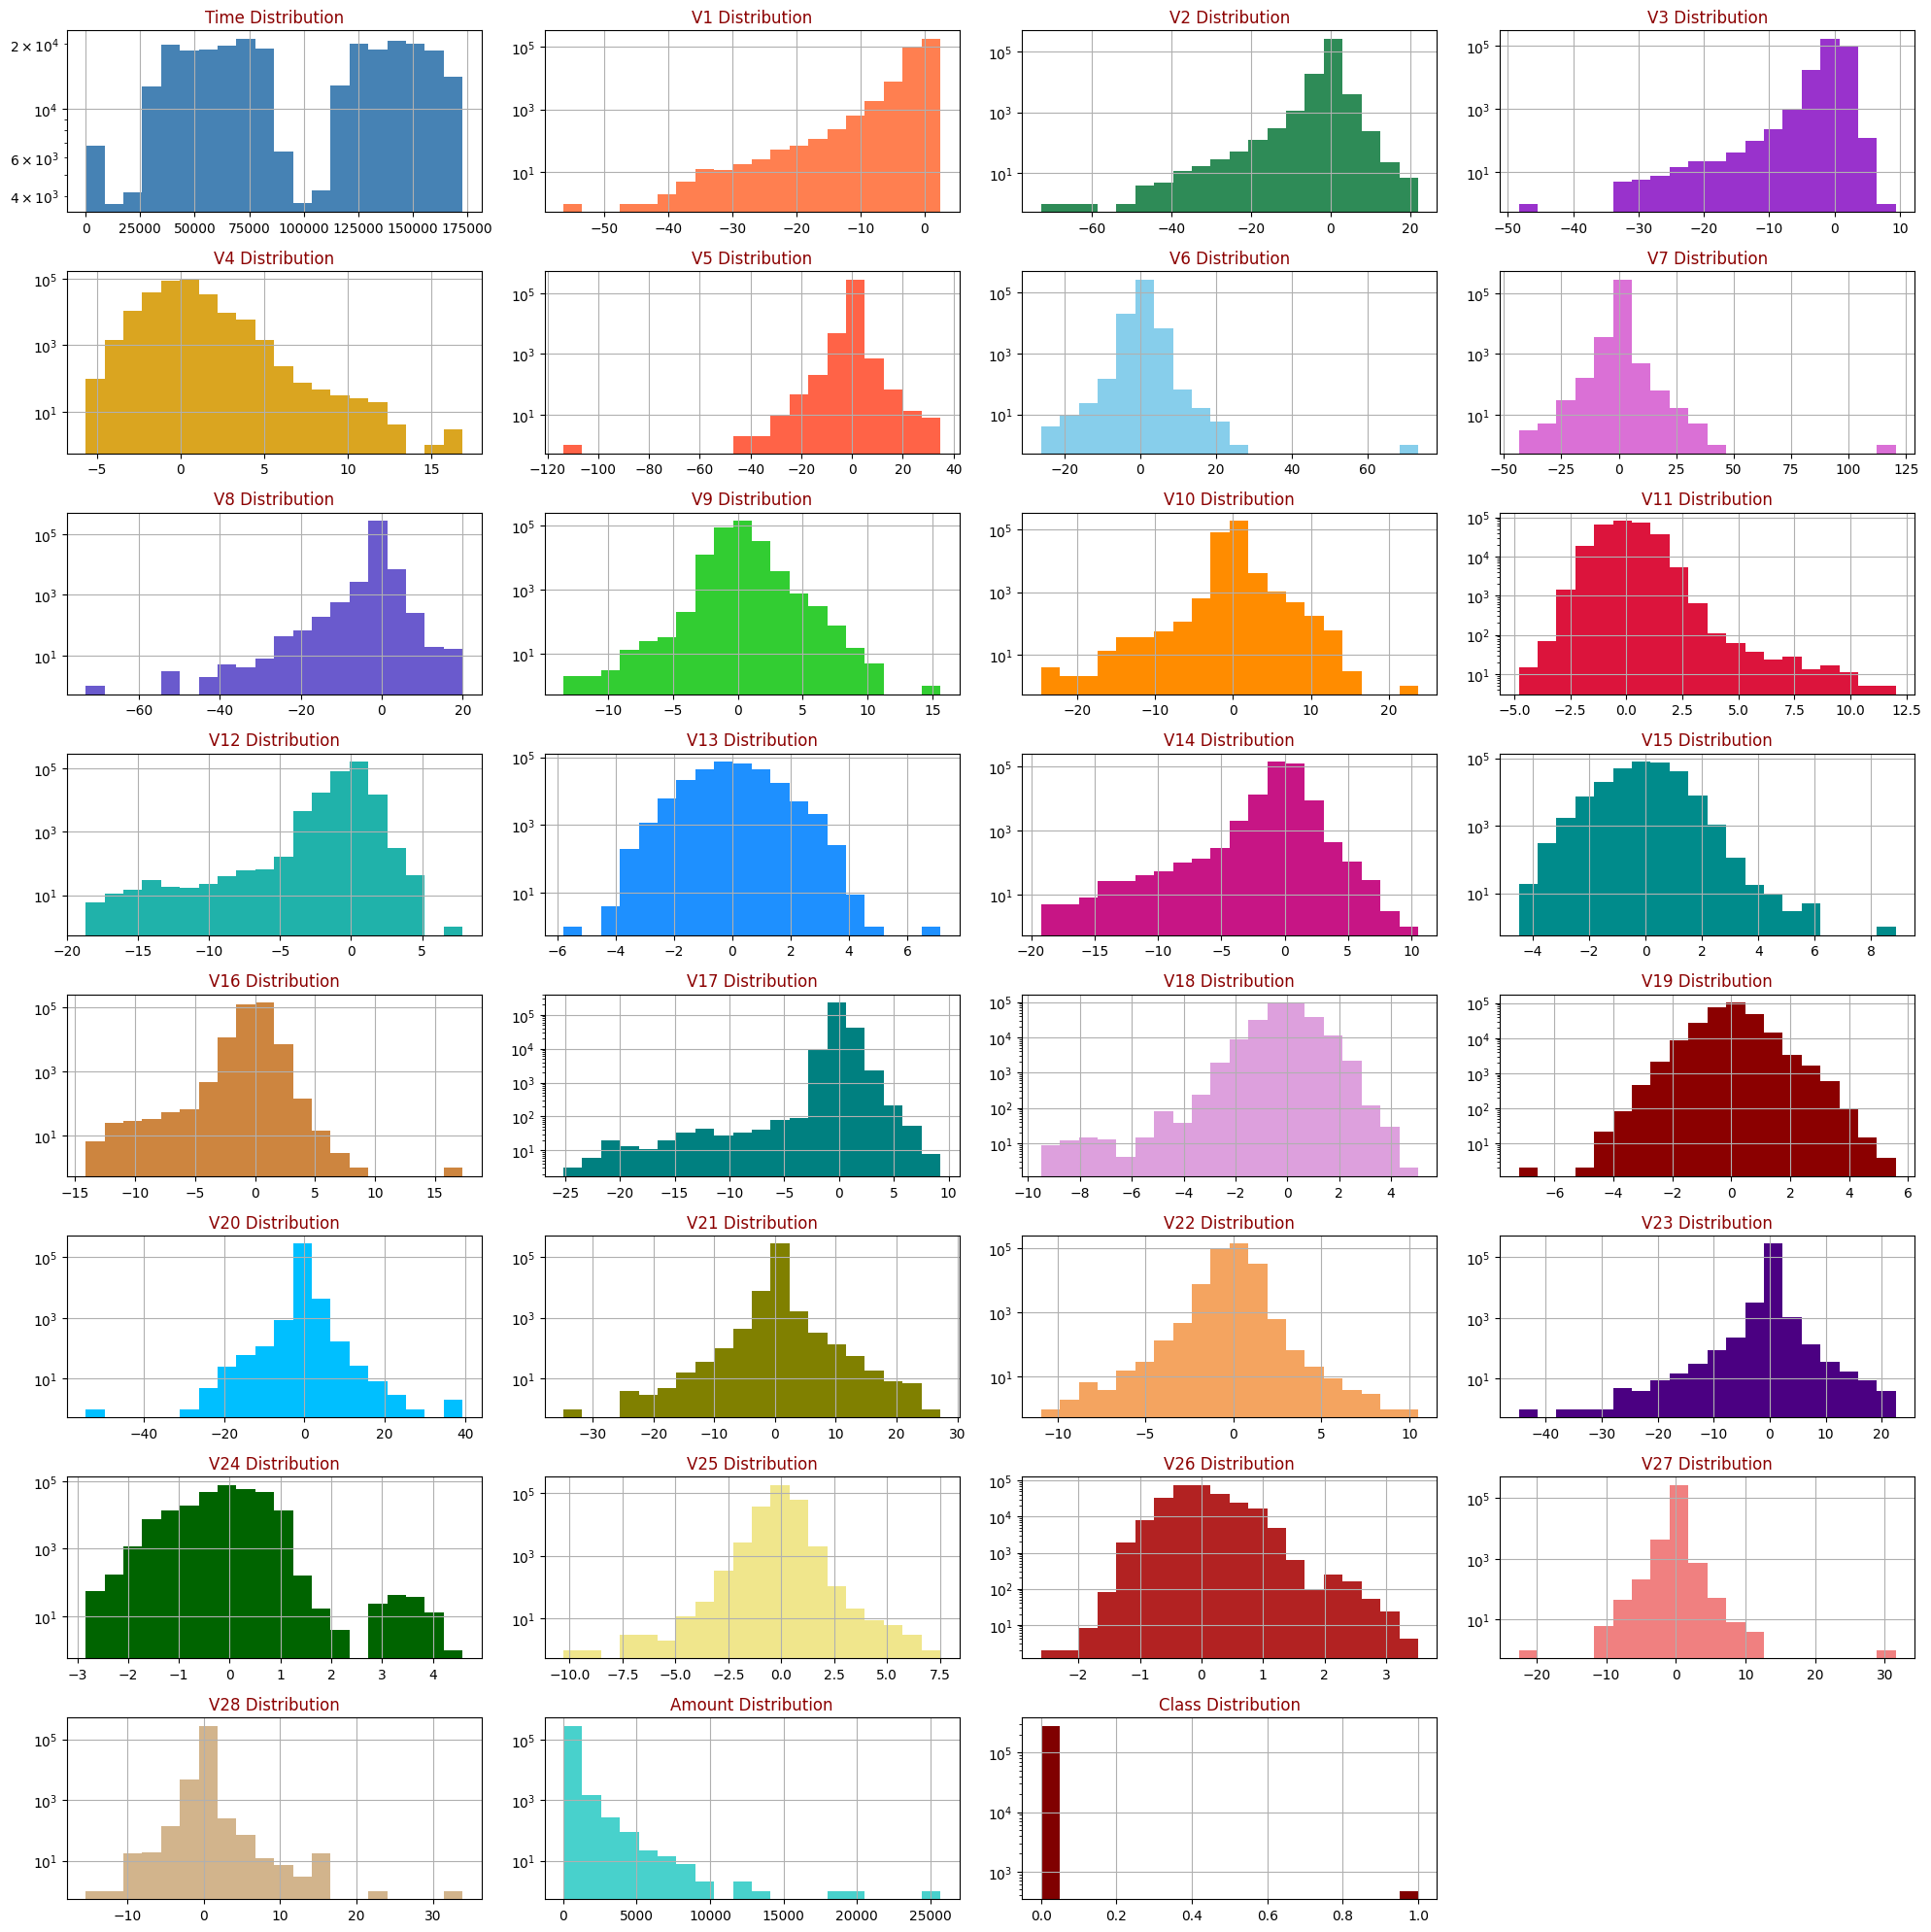

In [14]:
# Define a function to draw histograms for multiple features in a grid layout with different colors for each plot
def draw_histograms(dataframe, features, rows, cols):
    colors = ['steelblue', 'coral', 'seagreen', 'darkorchid', 'goldenrod', 'tomato', 'skyblue', 'orchid',
              'slateblue', 'limegreen', 'darkorange', 'crimson', 'lightseagreen', 'dodgerblue', 'mediumvioletred',
              'darkcyan', 'peru', 'teal', 'plum', 'darkred', 'deepskyblue', 'olive', 'sandybrown', 'indigo', 
              'darkgreen', 'khaki', 'firebrick', 'lightcoral', 'tan', 'mediumturquoise', 'maroon']
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor=colors[i % len(colors)])  # Assign different color to each plot
        ax.set_title(feature + " Distribution", color='DarkRed')
        ax.set_yscale('log')  # Set y-axis to a logarithmic scale for better visibility
    fig.tight_layout()  
    plt.show()

# Plot histograms for all columns in the dataset in an 8x4 grid with different colors for each plot
draw_histograms(card, card.columns, 8, 4)



In [15]:
# Count the occurrences of each class in the target variable
card['Class'].value_counts()


Class
0    283253
1       473
Name: count, dtype: int64

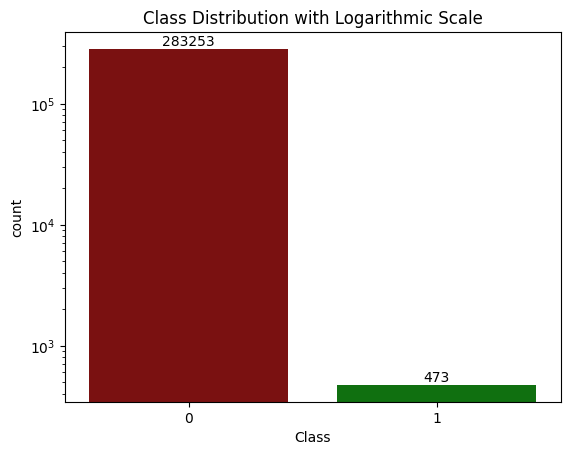

In [16]:
# Plot a count plot for the 'Class' column with a logarithmic scale, new custom colors, and a title
ax = sns.countplot(x='Class', data=card, palette=['darkred', 'green'])
ax.set_yscale('log')
ax.set_title('Class Distribution with Logarithmic Scale')

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


### Note

- There are 283253 records with no fraud status and 473 records with fraud status.

# Correlation Matrix

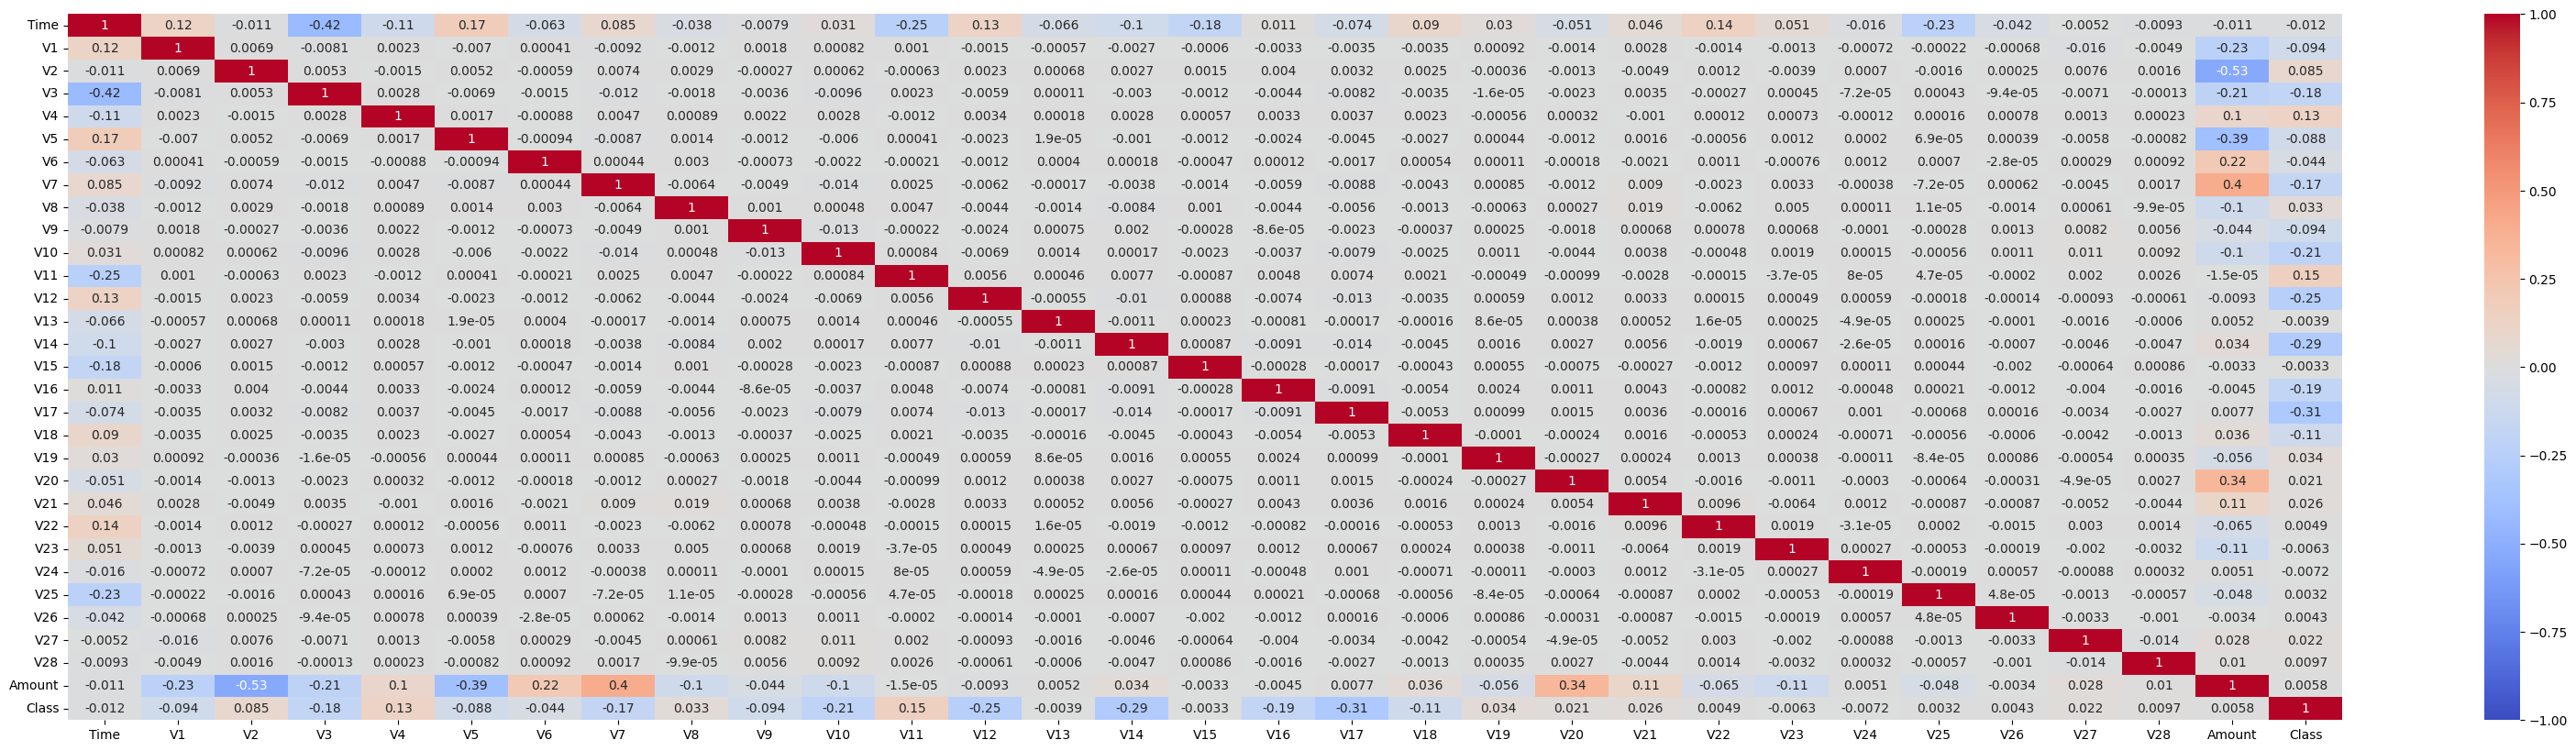

In [17]:
# Create a large heatmap to visualize the correlations between features
# Use a custom colormap where 1 is red and 0 is green, with vmin and vmax to control the color range
plt.figure(figsize=(40, 10))
sns.heatmap(card.corr(), annot=True, 
            cmap="coolwarm",
            vmin=-1, vmax=1)
plt.show()

### Note
 >- The heatmap highlights variables that are multicollinear and those with high correlation to the target variable.
 >- This map will be referenced during linear model building to validate correlations and p-values,
 >-  helping to identify which variables to keep or eliminate in the model.


# Logistic Regression

In [18]:
# Check the current shape of the dataset (rows, columns)
card.shape


(283726, 31)

In [19]:
# Display the dataset summary
card.info()


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [20]:
# Dropping the 'Time' column as it is not relevant to the business problem
estimators = [
    'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
]

# Define feature variables (X) and the target variable (y)
X1 = card[estimators]
y = card['Class']


In [21]:
# Select all columns except the last one (Amount) from the feature set
col = X1.columns[:-1]
col


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [22]:
# Add a constant to the feature set for the intercept in the logistic regression model
X = sm.add_constant(X1)

# Fit a logistic regression model using statsmodels
reg_logit = sm.Logit(y, X)
results_logit = reg_logit.fit()


Optimization terminated successfully.
         Current function value: 0.003927
         Iterations 13


In [23]:
# Display the summary of the logistic regression model results
results_logit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283696
Method:                           MLE   Df Model:                           29
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                  0.6815
Time:                        02:16:31   Log-Likelihood:                -1114.1
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7313      0.152    -57.566      0.000      -9.029      -8.434
V1             0.0842      0.041      2.029      0.042       0.003       0.166
V2             0.0142      0.058      0.244      0.807      -0.099       0.128
V3             0.0371      0.046      0.814      0.416      -0.052       0.126
V4             0.7085      0.074      9.606      0.000       0.564       0.853
V5             0.1034      0.066      1.576      0.115      -0.025       0.232
V6            -0.1269      0.076     -1.664      0.096      -0.276       0.023
V7            -0.1085      0.066     -1.640      0.101      -0.238       0.021
V8            -0.1713      0.031     -5.578      0.000      -0.231      -0.111
V9            -0.2598      0.110     -2.370      0.018      -0.475      -0.045
V10           -0.8242      0.097     -8.501      0.000      -1.014      -0.634
V11           -0.0090      0.076     -0.118      0.906      -0.158       0.140
V12            0.0625      0.086      0.725      0.468      -0.106       0.231
V13           -0.3147      0.081     -3.868      0.000      -0.474      -0.155
V14           -0.5361      0.062     -8.684      0.000      -0.657      -0.415
V15           -0.0922      0.084     -1.095      0.274      -0.257       0.073
V16           -0.2018      0.125     -1.616      0.106      -0.447       0.043
V17            0.0097      0.069      0.142      0.887      -0.125       0.145
V18           -0.0375      0.128     -0.294      0.769      -0.288       0.213
V19            0.0795      0.096      0.828      0.408      -0.109       0.268
V20           -0.4510      0.081     -5.541      0.000      -0.611      -0.291
V21            0.3730      0.058      6.416      0.000       0.259       0.487
V22            0.5874      0.129      4.566      0.000       0.335       0.840
V23           -0.0975      0.058     -1.681      0.093      -0.211       0.016
V24            0.1278      0.149      0.856      0.392      -0.165       0.421
V25           -0.0180      0.131     -0.137      0.891      -0.275       0.239
V26           -0.0131      0.190     -0.069      0.945      -0.385       0.359
V27           -0.8134      0.122     -6.658      0.000      -1.053      -0.574
V28           -0.2979      0.089     -3.343      0.001      -0.473      -0.123
Amount         0.0009      0.000      2.465      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Observation:
- Certain features exhibit P-values greater than the threshold of 0.05, suggesting a weaker 
- statistical significance in predicting the likelihood of heart disease.
- A backward elimination technique is applied to iteratively exclude features with the highest 
- P-values, refitting the model until all remaining features have P-values below 0.05.


# Identifying Important Features: Using the P-value method to perform Backward Elimination


In [24]:
def back_feature_elem(data_frame, dep_var, col_list):
    """
    Performs backward feature elimination using P-values.
    Repeatedly fits a regression model, eliminating the feature with the highest P-value 
    above the alpha threshold, until all remaining features have P-values below alpha.
    Returns the final regression model summary.
    """
    while len(col_list) > 0:
        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        
        if largest_pvalue[0] < 0.0001:  # Stop when all P-values are below the threshold
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

# Apply the backward feature elimination function to the dataset
result = back_feature_elem(X, card['Class'], col)



In [25]:
# Display the summary of the final logistic regression model after backward feature elimination
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               283726
Model:                          Logit   Df Residuals:                   283698
Method:                           MLE   Df Model:                           27
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                    -inf
Time:                        02:16:34   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -3498.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -3.8503      0.012   -314.625      0.000      -3.874      -3.826
V2             3.8048      0.012    310.135      0.000       3.781       3.829
V3            -8.5616      0.027   -319.025      0.000      -8.614      -8.509
V4             5.0462      0.016    313.283      0.000       5.015       5.078
V5            -5.9105      0.019   -314.060      0.000      -5.947      -5.874
V6            -2.0187      0.007   -271.803      0.000      -2.033      -2.004
V7           -11.1402      0.035   -318.515      0.000     -11.209     -11.072
V8             2.6585      0.009    284.651      0.000       2.640       2.677
V9            -5.4890      0.018   -309.594      0.000      -5.524      -5.454
V10          -12.7321      0.040   -318.828      0.000     -12.810     -12.654
V11            8.9049      0.028    316.080      0.000       8.850       8.960
V12          -16.0526      0.050   -319.507      0.000     -16.151     -15.954
V13            0.1949      0.005     37.561      0.000       0.185       0.205
V14          -16.6006      0.052   -319.557      0.000     -16.702     -16.499
V15           -0.3622      0.006    -63.189      0.000      -0.373      -0.351
V16          -15.1065      0.047   -318.684      0.000     -15.199     -15.014
V17          -27.3943      0.086   -320.370      0.000     -27.562     -27.227
V18          -10.1986      0.032   -315.451      0.000     -10.262     -10.135
V19            3.3170      0.012    273.860      0.000       3.293       3.341
V20            2.0012      0.009    210.708      0.000       1.983       2.020
V21            2.2942      0.010    231.734      0.000       2.275       2.314
V22            0.1861      0.007     25.998      0.000       0.172       0.200
V23           -0.2017      0.009    -21.842      0.000      -0.220      -0.184
V24           -0.1602      0.008    -18.862      0.000      -0.177      -0.144
V25            0.6242      0.011     59.429      0.000       0.604       0.645
V26            0.2029      0.011     18.870      0.000       0.182       0.224
V27            2.5322      0.016    156.071      0.000       2.500       2.564
V28            1.1545      0.016     74.214      0.000       1.124       1.185
==============================================================================
"""

### Logistic Regression Equation:
- P = e^(β0 + β1*X1) / (1 + e^(β0 + β1*X1))

 Where:
P represents the probability of the event occurring (e.g., fraud detection).

β0 is the intercept, and β1 represents the coefficients for the predictor variables X1.




# Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [26]:
# Calculate the Odds Ratios by exponentiating the model coefficients
params = np.exp(result.params)

# Calculate the confidence intervals for the coefficients and exponentiate them
conf = np.exp(result.conf_int())

# Add the Odds Ratios to the DataFrame
conf['OR'] = params

# Round and add the p-values to the DataFrame
pvalue = round(result.pvalues, 3)
conf['pvalue'] = pvalue

# Rename the columns for clarity
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio', 'pvalue']

# Print the resulting DataFrame with confidence intervals, odds ratios, and p-values
print(conf)


     CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
V1   2.076848e-02   2.178906e-02  2.127265e-02     0.0
V2   4.385003e+01   4.601034e+01  4.491720e+01     0.0
V3   1.815011e-04   2.016353e-04  1.913035e-04     0.0
V4   1.506059e+02   1.604219e+02  1.554365e+02     0.0
V5   2.612588e-03   2.812611e-03  2.710756e-03     0.0
V6   1.309120e-01   1.347793e-01  1.328315e-01     0.0
V7   1.355458e-05   1.554635e-05  1.451635e-05     0.0
V8   1.401585e+01   1.453848e+01  1.427477e+01     0.0
V9   3.990901e-03   4.278129e-03  4.132020e-03     0.0
V10  2.732381e-06   3.195398e-06  2.954834e-06     0.0
V11  6.971871e+03   7.785935e+03  7.367668e+03     0.0
V12  9.675672e-08   1.178184e-07  1.067695e-07     0.0
V13  1.202850e+00   1.227562e+00  1.215143e+00     0.0
V14  5.575098e-08   6.834237e-08  6.172645e-08     0.0
V15  6.883531e-01   7.039955e-01  6.961304e-01     0.0
V16  2.506076e-07   3.017815e-07  2.750068e-07     0.0
V17  1.071538e-12   1.498226e-12  1.267046e-12     0.0
V18  3.493

In [27]:
# Select a new set of features for the model, including the target variable 'Class'
new_features = card[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                     'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20', 'V21', 
                     'V22', 'V23', 'V25', 'V26', 'V27', 'Class']]

# Separate the feature variables (x) from the target variable (y)
x = new_features.iloc[:, :-1]
y = new_features.iloc[:, -1]

# Split the dataset into training and testing sets with a test size of 20%, stratified by the target variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [28]:
# Import the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred = logreg.predict(x_test)


# Model Evaluation

## Accuracy of the Model

In [29]:
# Import the classification report metric from scikit-learn
from sklearn.metrics import classification_report

# Print the classification report, which includes precision, recall, and F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.57      0.68        95

    accuracy                           1.00     56746
   macro avg       0.93      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746



## Observasion:
The model shows near-perfect performance for class 0 (non-fraudulent transactions), achieving high precision, recall, and F1-score. However, it struggles with class 1 (fraudulent transactions), which is common in imbalanced datasets.

- Precision: For class 1, the precision is relatively high at 86%, meaning when fraud is predicted, the model is usually correct.

- Recall: The recall for class 1 is lower at 58%, indicating that the model misses some actual fraud cases.

- F1-Score: The F1-score for class 1 is 0.69, balancing precision and recall. The lower F1-score shows that both precision and recall can be improved for fraud detection.

`Accuracy`: The overall accuracy is 100%, driven largely by the model's performance on class 0. However, this can be misleading in imbalanced datasets since accuracy alone does not fully reflect performance on the minority class (fraud).

# Confusion matrix

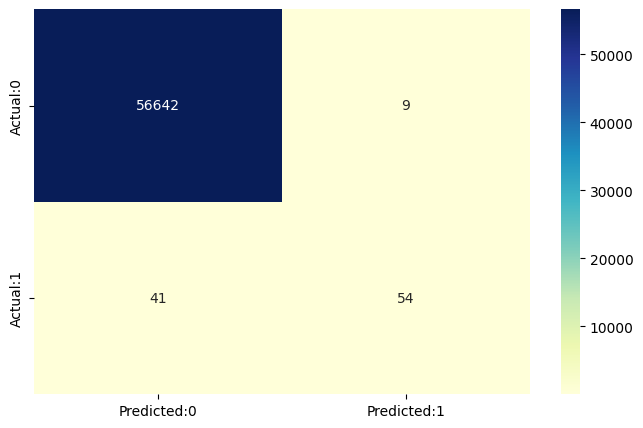

In [30]:
# Import the confusion matrix function from scikit-learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization of the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()


### The confusion matrix shows the following results:

- Actual 0, Predicted 0: The model correctly predicted 56,642 non-fraudulent transactions.
- Actual 1, Predicted 1: The model correctly identified 55 fraudulent transactions.
- Actual 0, Predicted 1: The model incorrectly predicted 9 non-fraudulent transactions as fraudulent. `(Type I error)`
- Actual 1, Predicted 0: The model missed 40 fraudulent transactions, predicting them as non-fraudulent.`(Type II error)`

This visualization highlights that while the model performs very well in detecting non-fraudulent transactions (class 0), it has some difficulty correctly identifying all fraudulent transactions (class 1), which is expected due to the imbalanced nature of the dataset.

In [31]:
# Extract the true negatives, true positives, false negatives, and false positives from the confusion matrix
TN = cm[0, 0]  # True Negatives
TP = cm[1, 1]  # True Positives
FN = cm[1, 0]  # False Negatives
FP = cm[0, 1]  # False Positives

# Calculate sensitivity (also known as recall or true positive rate)
sensitivity = TP / float(TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / float(TN + FP)


# Model Evaluation - Statistics

In [32]:
print(f"{'Metric':<40} {'Value':>15}")
print("-" * 60)
print(f"{'Accuracy of the model':<40} {((TP + TN) / float(TP + TN + FP + FN)):.4f}")
print(f"{'Misclassification Rate':<40} {(1 - ((TP + TN) / float(TP + TN + FP + FN))):.4f}")
print(f"{'Sensitivity (True Positive Rate)':<40} {(TP / float(TP + FN)):.4f}")
print(f"{'Specificity (True Negative Rate)':<40} {(TN / float(TN + FP)):.4f}")
print(f"{'Positive Predictive Value':<40} {(TP / float(TP + FP)):.4f}")
print(f"{'Negative Predictive Value':<40} {(TN / float(TN + FN)):.4f}")
print(f"{'Positive Likelihood Ratio':<40} {(sensitivity / (1 - specificity)):.4f}")
print(f"{'Negative Likelihood Ratio':<40} {((1 - sensitivity) / specificity):.4f}")


Metric                                             Value
------------------------------------------------------------
Accuracy of the model                    0.9991
Misclassification Rate                   0.0009
Sensitivity (True Positive Rate)         0.5684
Specificity (True Negative Rate)         0.9998
Positive Predictive Value                0.8571
Negative Predictive Value                0.9993
Positive Likelihood Ratio                3577.9579
Negative Likelihood Ratio                0.4316


# Conclusion:
From the above statistics, it is evident that the model is more specific than sensitive. This means that the model is better at accurately predicting negative cases (non-fraudulent transactions) than positive ones (fraudulent transactions). The high specificity indicates strong performance in identifying non-fraud cases, while the lower sensitivity shows that the model struggles more with identifying fraud cases.

In [33]:
# Predict the probabilities of both classes (fraud and non-fraud) for the test set
y_pred_prob = logreg.predict_proba(x_test)[:, :]

# Create a DataFrame to store the predicted probabilities for both classes
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)', 'Prob of Fraud (1)'])

# Display the first few rows of the predicted probabilities
y_pred_prob_df.head()


,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999683,0.000317
1,0.999698,0.000302
2,0.999960,0.000040
3,0.999874,0.000126
4,0.998584,0.001416


### Predicted probabilities of 0 (No Fraud) and 1 ( Fraud) for the test data with a default classification threshold of 0.5

### Lower the threshold

Given that the model is predicting fraud, it is crucial to minimize Type II errors. In this context, a False Negative (failing to detect fraud when it actually exists) poses a greater risk than a False Positive. Therefore, to enhance the model's sensitivity and better capture fraudulent cases, the classification threshold should be lowered.

In [34]:
from sklearn.preprocessing import binarize

# Evaluate the model's performance across different thresholds
for i in range(0, 11):
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test)
    
    # Binarize the predictions based on the current threshold
    y_pred2 = binarize(y_pred_prob_yes, threshold=i/10)[:, 1]
    
    # Generate the confusion matrix for the current threshold
    cm2 = confusion_matrix(y_test, y_pred2)
    
    # Display the confusion matrix, correct predictions, and Type II errors (False Negatives)
    print('With', i/10, 'threshold, the Confusion Matrix is:\n', cm2, '\n',
          'With', cm2[0, 0] + cm2[1, 1], 'correct predictions and', cm2[1, 0], 'Type II errors (False Negatives)', '\n\n',
          'Sensitivity:', cm2[1, 1] / float(cm2[1, 1] + cm2[1, 0]), 
          'Specificity:', cm2[0, 0] / float(cm2[0, 0] + cm2[0, 1]), '\n\n\n')


With 0.0 threshold, the Confusion Matrix is:
 [[    0 56651]
 [    0    95]] 
 With 95 correct predictions and 0 Type II errors (False Negatives) 

 Sensitivity: 1.0 Specificity: 0.0 



With 0.1 threshold, the Confusion Matrix is:
 [[56636    15]
 [   26    69]] 
 With 56705 correct predictions and 26 Type II errors (False Negatives) 

 Sensitivity: 0.7263157894736842 Specificity: 0.9997352209140175 



With 0.2 threshold, the Confusion Matrix is:
 [[56638    13]
 [   30    65]] 
 With 56703 correct predictions and 30 Type II errors (False Negatives) 

 Sensitivity: 0.6842105263157895 Specificity: 0.9997705247921485 



With 0.3 threshold, the Confusion Matrix is:
 [[56640    11]
 [   35    60]] 
 With 56700 correct predictions and 35 Type II errors (False Negatives) 

 Sensitivity: 0.631578947368421 Specificity: 0.9998058286702795 



With 0.4 threshold, the Confusion Matrix is:
 [[56641    10]
 [   35    60]] 
 With 56701 correct predictions and 35 Type II errors (False Negatives) 


## ROC `(Receiver Operating Characteristic)` Curve

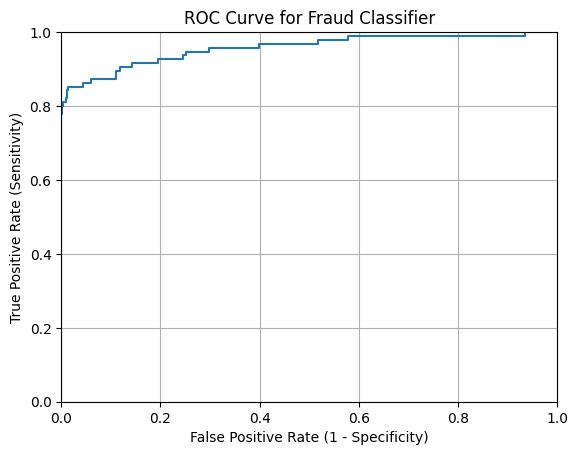

In [35]:
from sklearn.metrics import roc_curve

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Fraud Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


The ROC curve illustrates the performance of your fraud detection model by showing the trade-off between sensitivity (the ability to correctly identify fraud) and the false positive rate (incorrectly flagging non-fraud as fraud). The curve rises steeply towards the top-left corner, indicating that the model effectively detects fraud with a low false positive rate. This suggests that the model is good at distinguishing between fraudulent and non-fraudulent transactions, with a high likelihood of achieving a strong overall performance.

### Understanding the ROC Curve:
The ROC (Receiver Operating Characteristic) curve is a powerful tool for evaluating the performance of a classification model across different threshold settings. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold levels, allowing you to visualize the trade-offs between detecting true positives and avoiding false positives.

True Positive Rate (Sensitivity): This indicates how well the model identifies actual fraud cases.
False Positive Rate (1 - Specificity): This shows the proportion of non-fraud cases incorrectly flagged as fraud.
A well-performing model will have a curve that bows towards the upper left corner, indicating high sensitivity and low false positive rates across different thresholds.

#### Optimal Threshold:
The best threshold is often found where the ROC curve is closest to the top-left corner, where both sensitivity and specificity are maximized. This ensures that the model correctly identifies fraud while minimizing the false alarms.

### Area Under the Curve (AUC):
The AUC (Area Under the Curve) quantifies the overall performance of the model. A higher AUC indicates better discrimination between the positive and negative classes, with an AUC of 1 representing a perfect model. Conversely, an AUC closer to 0.5 suggests the model's performance is no better than random guessing.

In summary, the ROC curve and AUC provide valuable insights into the model's ability to distinguish between fraud and non-fraud cases, guiding the selection of an optimal decision threshold.

In [36]:
from sklearn.metrics import roc_auc_score

# Calculate the Area Under the ROC Curve (AUC) for the test data and round to 2 decimal places
auc_score = round(roc_auc_score(y_test, y_pred_prob_yes[:, 1]), 2)

# Display the AUC score
auc_score


0.96

# Conclusion:
- All attributes selected after the elimination process have p-values lower than 5%, indicating they have a significant role in predicting fraud.
- The Area Under the ROC Curve (AUC) is 96%, reflecting strong model performance in distinguishing between fraudulent and non-fraudulent transactions.
- While the model performs well, there is potential for further improvement, possibly by incorporating more data or exploring additional features.